### Chloropleth Map

1. state
2. job_id
3. normailized salary
4. total_jobs(derived col): count(job_id)
5. top job of each state

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile
# import pandas as pd

# # Path to the zip file
# zip_path = '/content/drive/MyDrive/vizdata.zip'
# csv_filename = 'postings.csv'  # Name of the CSV file inside the zip

# # Open the ZIP file and read the CSV with a row limit
# with zipfile.ZipFile(zip_path, 'r') as z:
#     with z.open(csv_filename) as f:
#         # Read only the first 100 rows (adjust as needed)
#         df = pd.read_csv(f)

# # # Display the first few rows of the DataFrame
# # print(df)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/vizdata'

In [ ]:
cd /content/drive/MyDrive/vizdata

/content/drive/MyDrive/vizdata


In [ ]:
df = pd.read_csv('postings.csv.zip', compression='zip')


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,2.9,3.1,3.1,3.2,3.3,3.5,3.4,3.7,3.4,3.5,3.3,3.5
1,2015,3.7,3.7,3.6,3.8,3.8,3.6,4.1,3.7,3.7,3.9,3.8,3.9
2,2016,4.0,3.9,4.1,3.9,3.9,3.8,4.0,3.8,3.9,3.7,4.0,3.9
3,2017,3.7,3.9,3.8,4.0,3.8,4.1,4.1,4.1,4.1,4.2,4.1,4.1
4,2018,4.3,4.2,4.4,4.4,4.5,4.6,4.6,4.6,4.7,4.7,4.8,4.8


In [ ]:
df.shape

(123849, 31)

In [ ]:
df = df.dropna(subset=['company_name'])

In [ ]:
df.shape

(122130, 31)

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [ ]:
df = df[['job_id', 'company_name', 'title' , 'max_salary',
       'pay_period', 'location', 'company_id', 'med_salary',
       'min_salary', 'formatted_work_type',  'original_listed_time',
       'remote_allowed',
       'formatted_experience_level', 'listed_time',
       'work_type', 'currency',
       'compensation_type', 'normalized_salary']]

### Preprocess Location

Converted location column to city, state, country

In [ ]:
df.location.value_counts()[:10]

In [ ]:
newdf = df.location.value_counts()

In [ ]:
newdf.to_csv('newdf.csv')

In [ ]:
# Preprocess examples like:
# States are repeated : soma have state name and some have state code
# Las Vegas, Nevada, United States	1
# Butler County, PA	1
# Dublin, Ohio, United States

import pandas as pd
import re

state_code_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_name_map = {v: k for k, v in state_code_map.items()}

def standardize_state(state):
    state = state.strip().lower()

    if state.upper() in state_code_map.values():
        return state.upper()

    for full_name, code in state_code_map.items():
        if state == full_name.lower():
            return code

    return None

def preprocess_location(location):
    location = location.strip()

    if 'United States' in location or 'USA' in location:
        parts = location.split(',')
        if len(parts) >= 3:
            city, state, country = parts[0].strip(), parts[1].strip(), 'US'
            return city, standardize_state(state), country
        elif len(parts) == 2:
            city, state = parts[0].strip(), parts[1].strip()
            return city, standardize_state(state), 'US'
        else:
            return location.strip(), None, 'US'

    parts = location.split(',')
    if len(parts) == 2:
        city, state = parts[0].strip(), parts[1].strip()
        return city, standardize_state(state), 'US'

    return location, None, None


df[['city', 'state', 'country_code']] = df['location'].apply(lambda loc: pd.Series(preprocess_location(loc)))




In [ ]:
df.state.value_counts()[:5]

,count
state,
CA,11562
TX,10197
NY,6043
FL,5872
NC,4924
IL,4430
PA,4104
VA,3648
MA,3485


In [ ]:
newdf = df.state.value_counts()

In [ ]:
newdf.to_csv('newdf.csv')

In [ ]:
len(df[df.state.isnull()])

17533

In [ ]:
# Dropping these values
df[df.state.isnull()]['location'].value_counts()

,count
location,
United States,7847
New York City Metropolitan Area,799
"New York, United States",574
"California, United States",469
San Francisco Bay Area,310
Dallas-Fort Worth Metroplex,309
"Texas, United States",287
Los Angeles Metropolitan Area,265
Washington DC-Baltimore Area,255


In [ ]:
df = df[df.state.notnull()]

## Job ID and Title



In [ ]:
df['job_id'].isnull().sum()

0

In [ ]:
df['job_id'].value_counts()[:5]

,count
job_id,
921716,1
3904068247,1
3904068406,1
3904068403,1
3904068363,1


In [ ]:
df['title'].nunique()

61991

In [ ]:
df['title'].value_counts()[:50]

,count
title,
Sales Manager,572
Customer Service Representative,338
Project Manager,269
Administrative Assistant,207
Registered Nurse,197
Receptionist,192
Senior Accountant,188
Retail Sales Associate,186
Sales Associate,179


Derived column: Total jobs in each state

In [ ]:
df['total_jobs_in_state'] = df.groupby('state')['job_id'].transform('count')


In [ ]:
df[['state', 'total_jobs_in_state']].head()

,state,total_jobs_in_state
0,NJ,3249
2,OH,3402
3,NY,6043
5,NC,4924
8,NE,591


Derived columns: Top jobs in each state

In [ ]:
job_counts = df.groupby(['state', 'title']).size().reset_index(name='job_count')

top_jobs = job_counts.loc[job_counts.groupby('state')['job_count'].idxmax()]

state_top_job = dict(zip(top_jobs['state'], top_jobs['title']))

df['top_job_in_state'] = df['state'].map(state_top_job)


In [ ]:
df[df['state'].notnull()][['state', 'top_job_in_state']][:50]

,state,top_job_in_state
0,NJ,Mortgage Loan Officer
2,OH,Sales Manager
3,NY,Sales Manager
5,NC,HOSPICE REGISTERED NURSE
8,NE,Packaging Engineer
9,FL,Customer Service Representative
10,MI,Sales Manager
11,MO,Sales Manager
15,AK,Personal Banker - Roving Southeast Alaska Dist...
16,OH,Sales Manager


## Industry column

In [ ]:
ind = pd.read_csv('companies/company_industries.csv')

In [ ]:
df['company_id'].isnull().sum()

0

In [ ]:
df = pd.merge(df, ind, on='company_id', how='left')

In [ ]:
industry_counts = df.groupby('industry').size().reset_index(name='job_count')

top_10_industries = industry_counts.sort_values(by='job_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_industries['industry'], top_10_industries['job_count'], color='lightcoral')

plt.xlabel('Number of Job Postings')
plt.ylabel('Industry')
plt.title('Top 10 Industries by Number of Job Postings')
plt.tight_layout()

plt.show()

In [ ]:
industry_salary = df.groupby('industry')['normalized_salary'].median().reset_index()

top_10_salaries = industry_salary.sort_values(by='normalized_salary', ascending=False).head(10)

filtered_df = df[df['industry'].isin(top_10_salaries['industry'])]

plt.figure(figsize=(12, 6))
filtered_df.boxplot(column='normalized_salary', by='industry', grid=False)

plt.title('Salary Distribution by Industry (Top 10)')
plt.suptitle('')
plt.xlabel('Industry')
plt.ylabel('Normalized Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



In [ ]:
industry_counts = df.groupby('industry').size().reset_index(name='job_count')

top_10_industries = industry_counts.sort_values(by='job_count', ascending=False).head(10)

filtered_df = df[df['industry'].isin(top_10_industries['industry'])]

pivot_df = filtered_df.pivot_table(index='industry', columns='state', aggfunc='size', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.Paired.colors)

plt.xlabel('Industry')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Industry and State (Top 10 Industries)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
industry_state_counts = df.groupby(['industry', 'state']).size().reset_index(name='job_count')

top_states = df.groupby('state').size().reset_index(name='job_count').sort_values(by='job_count', ascending=False).head(10)

top_industries = df.groupby('industry').size().reset_index(name='job_count').sort_values(by='job_count', ascending=False).head(10)

filtered_df = industry_state_counts[
    (industry_state_counts['state'].isin(top_states['state'])) &
    (industry_state_counts['industry'].isin(top_industries['industry']))
]

pivot_df = filtered_df.pivot_table(index='industry', columns='state', values='job_count', fill_value=0)

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=plt.cm.Paired.colors)

plt.xlabel('Industry')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Industry and State (Top 10 Industries and Top 10 States)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Salary columns

In [ ]:
df.head()

,job_id,company_name,title,max_salary,pay_period,location,company_id,med_salary,min_salary,formatted_work_type,original_listed_time,remote_allowed,formatted_experience_level,listed_time,work_type,currency,compensation_type,normalized_salary,city,state,country_code,total_jobs_in_state,top_job_in_state
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,NaN,17.0,Full-time,1.713398e+12,NaN,NaN,1.713398e+12,FULL_TIME,USD,BASE_SALARY,38480.0,Princeton,NJ,US,3249,Mortgage Loan Officer
2,10998357,The National Exemplar,Assitant Restaurant Manager,65000.0,YEARLY,"Cincinnati, OH",64896719.0,NaN,45000.0,Full-time,1.713278e+12,NaN,NaN,1.713278e+12,FULL_TIME,USD,BASE_SALARY,55000.0,Cincinnati,OH,US,3402,Sales Manager
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,NaN,140000.0,Full-time,1.712896e+12,NaN,NaN,1.712896e+12,FULL_TIME,USD,BASE_SALARY,157500.0,New Hyde Park,NY,US,6043,Sales Manager
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,20.0,HOURLY,"Raleigh, NC",1481176.0,NaN,14.0,Internship,1.713456e+12,NaN,NaN,1.713456e+12,INTERNSHIP,USD,BASE_SALARY,35360.0,Raleigh,NC,US,4924,HOSPICE REGISTERED NURSE
8,1218575,Children's Nebraska,Respiratory Therapist,NaN,NaN,"Omaha, NE",721189.0,NaN,NaN,Full-time,1.712348e+12,NaN,NaN,1.712348e+12,FULL_TIME,NaN,NaN,NaN,Omaha,NE,US,591,Packaging Engineer


In [ ]:
df.pay_period.value_counts()

,count
pay_period,
YEARLY,16059
HOURLY,12945
MONTHLY,454
WEEKLY,177
BIWEEKLY,9


In [ ]:
df.formatted_work_type.value_counts()

,count
formatted_work_type,
Full-time,84147
Contract,8939
Part-time,8868
Temporary,1070
Internship,737
Volunteer,447
Other,389


In [ ]:
df.compensation_type.value_counts()

,count
compensation_type,
BASE_SALARY,29644


In [ ]:
df.currency.value_counts()

,count
currency,
USD,29632
EUR,6
CAD,2
BBD,2
GBP,2


In [ ]:
df[['max_salary', 'min_salary', 'med_salary', 'normalized_salary']][:50]

,max_salary,min_salary,med_salary,normalized_salary
0,20.0,17.0,NaN,38480.0
2,65000.0,45000.0,NaN,55000.0
3,175000.0,140000.0,NaN,157500.0
5,20.0,14.0,NaN,35360.0
8,NaN,NaN,NaN,NaN
9,NaN,NaN,350.00,4200.0
10,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN
16,NaN,NaN,25.00,52000.0


In [ ]:
df['normalized_salary'].notna().sum()

35563

In [ ]:
df[['max_salary', 'min_salary', 'med_salary', 'normalized_salary']].describe()

,max_salary,min_salary,med_salary,normalized_salary
count,2.933800e+04,2.933800e+04,6225.000000,3.556300e+04
mean,9.224880e+04,6.511109e+04,22007.328069,2.070071e+05
std,7.064466e+05,4.997555e+05,52387.406391,5.134025e+06
min,1.000000e+00,1.000000e+00,0.000000,0.000000e+00
25%,4.867500e+01,3.750000e+01,18.860000,5.200000e+04
50%,8.000000e+04,6.020000e+04,25.370000,8.185000e+04
75%,1.400000e+05,1.000000e+05,2500.000000,1.250000e+05
max,1.200000e+08,8.500000e+07,750000.000000,5.356000e+08


In [ ]:
q1 = df['normalized_salary'].quantile(0.25)
q3 = df['normalized_salary'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df2 = df[(df['normalized_salary'].isna()) | ((df['normalized_salary'] >= lower_bound) & (df['normalized_salary'] <= upper_bound))]


In [ ]:
df2['normalized_salary'][:20]

,normalized_salary
0,38480.0
2,55000.0
3,157500.0
5,35360.0
8,NaN
9,4200.0
10,NaN
11,NaN
15,NaN
16,52000.0


In [ ]:
df2[['max_salary', 'min_salary', 'med_salary', 'normalized_salary']].describe()

,max_salary,min_salary,med_salary,normalized_salary
count,23298.000000,23298.000000,5506.000000,28804.000000
mean,74431.873569,53463.381579,16576.801402,85702.694520
std,73793.313433,51876.655614,36240.192275,45378.909006
min,1.000000,1.000000,0.000000,0.000000
25%,39.000000,30.000000,18.435000,48880.000000
50%,72400.000000,55000.000000,24.720000,75000.000000
75%,126391.940000,90000.000000,100.000000,115000.000000
max,400000.000000,220000.000000,220000.000000,224193.500000


In [ ]:
df2.shape

(103757, 23)

In [ ]:
df2.normalized_salary.isnull().sum()

74953

## Timestamp

In [ ]:
df.listed_time[:10]

,listed_time
0,1.713398e+12
2,1.713278e+12
3,1.712896e+12
5,1.713456e+12
8,1.712348e+12
9,1.712456e+12
10,1.713211e+12
11,1.712858e+12
15,1.713466e+12
16,1.712856e+12


The values in the listed_time column appear to be Unix timestamps (also known as epoch time), which represent the number of seconds (or milliseconds) that have passed since January 1, 1970, 00:00:00 UTC (the Unix epoch).

In your case, the values seem to be in milliseconds, which means each number represents a point in time with millisecond precision. You can convert these timestamps into human-readable date formats using Python.

In [ ]:
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms')
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms')


In [ ]:
df[['original_listed_time','listed_time']][:10]

,original_listed_time,listed_time
0,2024-04-17 23:45:08,2024-04-17 23:45:08
2,2024-04-16 14:26:54,2024-04-16 14:26:54
3,2024-04-12 04:23:32,2024-04-12 04:23:32
5,2024-04-18 16:01:39,2024-04-18 16:01:39
8,2024-04-05 20:21:40,2024-04-05 20:21:40
9,2024-04-07 02:12:35,2024-04-07 02:12:35
10,2024-04-15 19:49:26,2024-04-15 19:49:26
11,2024-04-11 17:58:42,2024-04-11 17:58:42
15,2024-04-18 18:53:54,2024-04-18 18:53:54
16,2024-04-11 17:14:46,2024-04-11 17:14:46


In [ ]:
df['listed_time'].dt.month.value_counts()

,count
listed_time,
4,104596
3,1


In [ ]:
df['original_listed_time'].dt.month.value_counts()

,count
original_listed_time,
4,102988
3,1597
2,6
1,4
12,2


In [ ]:
df.head()

,job_id,company_name,title,max_salary,pay_period,location,company_id,med_salary,min_salary,formatted_work_type,original_listed_time,remote_allowed,formatted_experience_level,listed_time,work_type,currency,compensation_type,normalized_salary,city,state,country_code,total_jobs_in_state,top_job_in_state
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,NaN,17.0,Full-time,2024-04-17 23:45:08,NaN,NaN,2024-04-17 23:45:08,FULL_TIME,USD,BASE_SALARY,38480.0,Princeton,NJ,US,3249,Mortgage Loan Officer
2,10998357,The National Exemplar,Assitant Restaurant Manager,65000.0,YEARLY,"Cincinnati, OH",64896719.0,NaN,45000.0,Full-time,2024-04-16 14:26:54,NaN,NaN,2024-04-16 14:26:54,FULL_TIME,USD,BASE_SALARY,55000.0,Cincinnati,OH,US,3402,Sales Manager
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,NaN,140000.0,Full-time,2024-04-12 04:23:32,NaN,NaN,2024-04-12 04:23:32,FULL_TIME,USD,BASE_SALARY,157500.0,New Hyde Park,NY,US,6043,Sales Manager
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,20.0,HOURLY,"Raleigh, NC",1481176.0,NaN,14.0,Internship,2024-04-18 16:01:39,NaN,NaN,2024-04-18 16:01:39,INTERNSHIP,USD,BASE_SALARY,35360.0,Raleigh,NC,US,4924,HOSPICE REGISTERED NURSE
8,1218575,Children's Nebraska,Respiratory Therapist,NaN,NaN,"Omaha, NE",721189.0,NaN,NaN,Full-time,2024-04-05 20:21:40,NaN,NaN,2024-04-05 20:21:40,FULL_TIME,NaN,NaN,NaN,Omaha,NE,US,591,Packaging Engineer


In [ ]:
df2.columns

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'med_salary', 'min_salary',
       'formatted_work_type', 'original_listed_time', 'remote_allowed',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'city', 'state',
       'country_code', 'total_jobs_in_state', 'top_job_in_state'],
      dtype='object')

In [ ]:
df2 = df2[['job_id', 'company_name', 'title', 'pay_period',
       'company_id', 'formatted_work_type',  'remote_allowed',
       'formatted_experience_level', 'work_type',
       'compensation_type', 'normalized_salary', 'city', 'state',
       'country_code', 'total_jobs_in_state', 'top_job_in_state']]

In [ ]:
df2.to_csv('final_data.csv', index=False)

## Bar Charts examples

In [ ]:
top_locations = df[df.state.notnull()]['state'].value_counts().head(10)

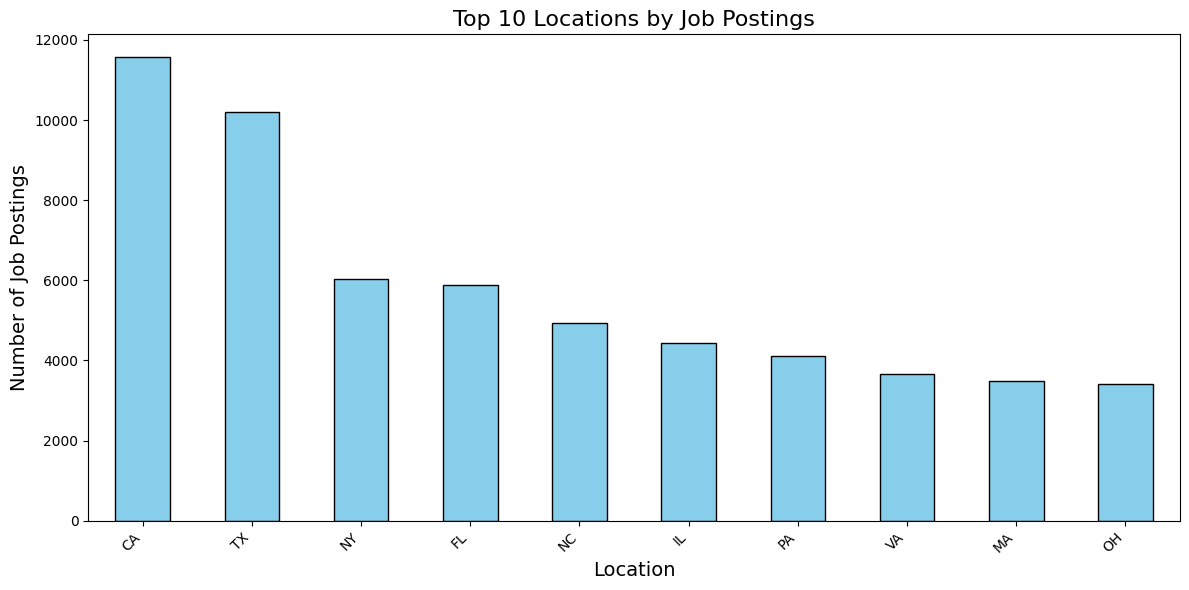

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Locations by Job Postings', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

top 10 job postings state-wise(dropdown: state)

      state                                         title  job_count
9978     CA                                 Sales Manager         49
4465     CA       Board Certified Behavior Analyst (BCBA)         40
5341     CA               Customer Service Representative         33
6100     CA                           Executive Assistant         30
9353     CA                                  Receptionist         26
10167    CA                             Senior Accountant         25
3819     CA                      Administrative Assistant         24
9091     CA                               Project Manager         23
8377     CA  Package Handler - Part Time (Warehouse like)         22
9438     CA                              Registered Nurse         22


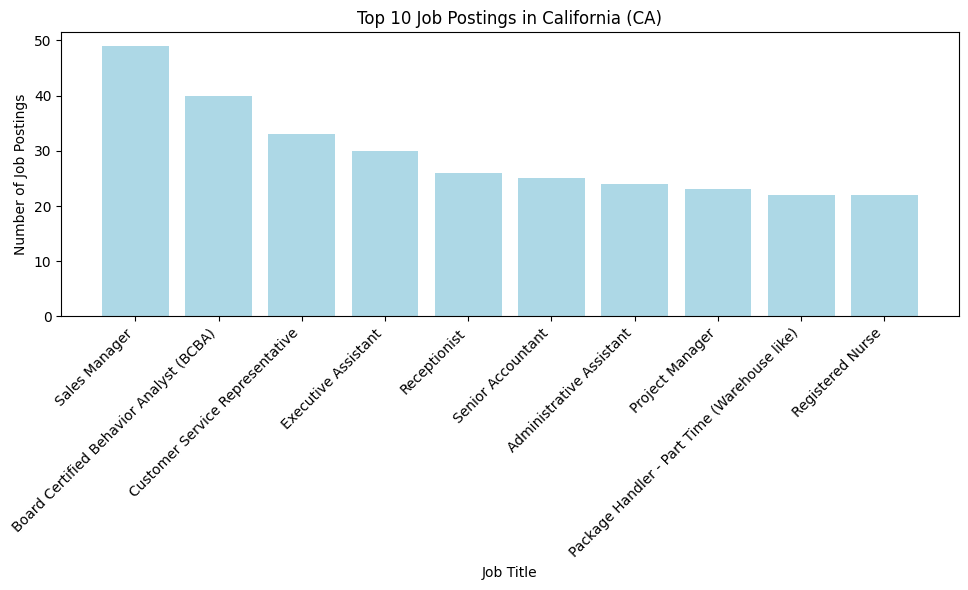

In [ ]:
job_counts = df[df['state'].notnull()].groupby(['state', 'title']).size().reset_index(name='job_count')

filtered_job_counts = job_counts[job_counts['state'] == 'CA']

top_10_job_counts = filtered_job_counts.sort_values(by='job_count', ascending=False).head(10)
print(top_10_job_counts)

plt.figure(figsize=(10, 6))
plt.bar(top_10_job_counts['title'], top_10_job_counts['job_count'], color='lightblue')


plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Job Postings in California (CA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Top 10 Job Titles by Median Normalized Salary

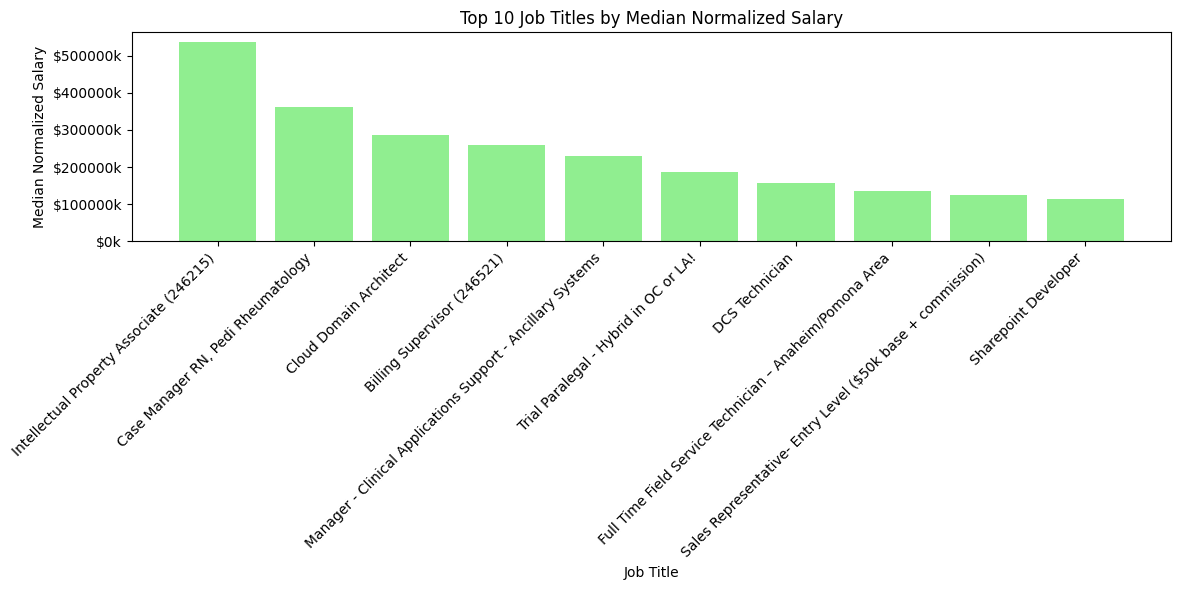

In [ ]:
import matplotlib.ticker as ticker

median_salary = df.groupby('title')['normalized_salary'].median().reset_index()

top_10_salaries = median_salary.sort_values(by='normalized_salary', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_salaries['title'], top_10_salaries['normalized_salary'], color='lightgreen')

plt.xlabel('Job Title')
plt.ylabel('Median Normalized Salary')
plt.title('Top 10 Job Titles by Median Normalized Salary')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

plt.tight_layout()

plt.show()

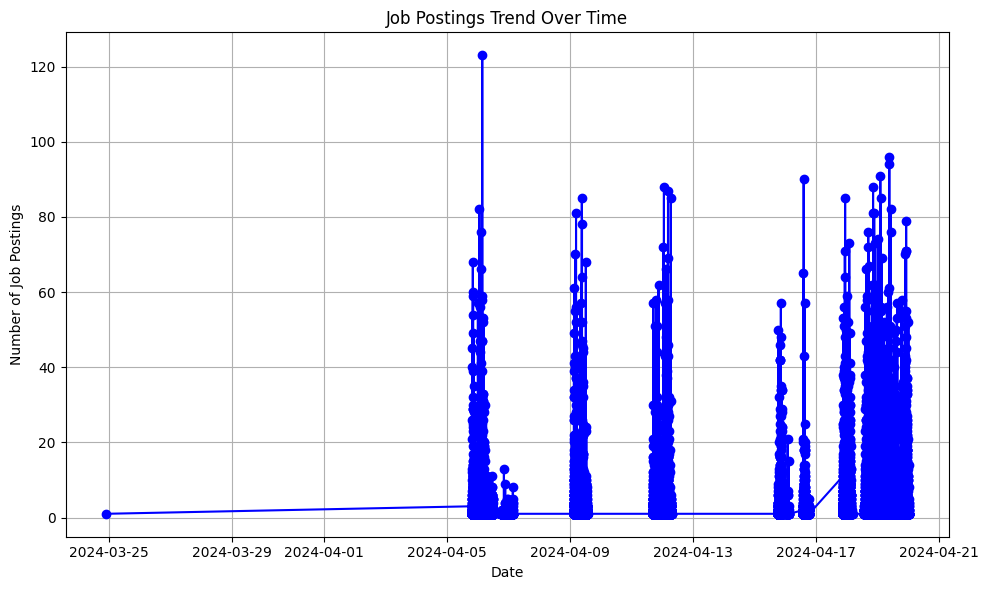

In [ ]:
job_postings_trend = df.groupby('listed_time').size().reset_index(name='job_count')

plt.figure(figsize=(10, 6))
plt.plot(job_postings_trend['listed_time'], job_postings_trend['job_count'], marker='o', linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings Trend Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

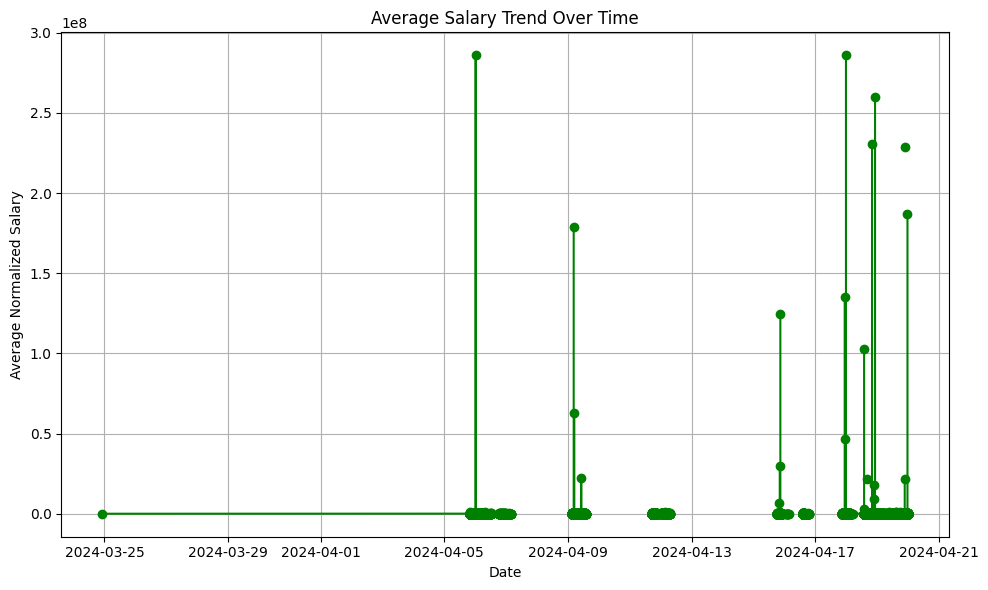

In [ ]:
salary_trend = df.groupby('listed_time')['normalized_salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(salary_trend['listed_time'], salary_trend['normalized_salary'], marker='o', linestyle='-', color='green')

plt.xlabel('Date')
plt.ylabel('Average Normalized Salary')
plt.title('Average Salary Trend Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

end for now

In [ ]:
selected_columns = ['company_name', 'title', 'location', 'job_id', 'company_id', 'formatted_work_type', 'normalized_salary' , 'max_salary', 'min_salary', 'pay_period']  # Modify as needed

df1 = df[selected_columns]

df1.head()

In [ ]:
# Number of Job postings vs location
# Max salary for each state, Min salary for each state
# company id -> industry  industry -> no of jobs for state, min and max salary,
# job type vs conpany

In [ ]:
#preprocessing
#Hourly -> yearly
#drop columns drop nan company values
#joining compny industries to posting



In [ ]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,city,state,country_code,total_jobs_in_state,top_job_in_state,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,2024-04-17 23:45:08,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,Princeton,NJ,US,3249.0,Mortgage Loan Officer,Real Estate
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,2024-04-16 14:26:54,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,Cincinnati,OH,US,3402.0,Sales Manager,Restaurants
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,2024-04-12 04:23:32,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,New Hyde Park,NY,US,6043.0,Sales Manager,Law Practice
3,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,14.0,Internship,4.0,1.713456e+12,NaN,https://www.linkedin.com/jobs/view/91700727/?t...,NaN,ComplexOnsiteApply,1.716048e+12,NaN,NaN,NaN,2024-04-18 16:01:39,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,Raleigh,NC,US,4924.0,HOSPICE REGISTERED NURSE,Non-profit Organizations
4,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,60000.0,Contract,1.0,1.712861e+12,1.0,https://www.linkedin.com/jobs/view/103254301/?...,NaN,SimpleOnsiteApply,1.715453e+12,NaN,NaN,NaN,2024-04-11 18:43:39,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,United States,None,US,NaN,NaN,Design Services


In [ ]:
df.to_csv('final_data.csv')

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips', 'city',
       'state', 'country_code', 'total_jobs_in_state', 'top_job_in_state',
       'industry'],
      dtype='object')

In [ ]:
df['currency'].value_counts()

,count
currency,
USD,35618
EUR,6
CAD,3
BBD,2
GBP,2


In [ ]:
final = df[['job_id', 'company_name', 'title' , 'max_salary',
       'pay_period', 'location', 'company_id', 'med_salary',
       'min_salary', 'formatted_work_type',  'original_listed_time',
       'remote_allowed',
       'formatted_experience_level', 'listed_time',
       'work_type', 'currency',
       'compensation_type', 'normalized_salary',  'city',
       'state', 'country_code', 'total_jobs_in_state', 'top_job_in_state',
       'industry']]

In [ ]:
final.isna().sum()

,0
job_id,0
company_name,0
title,0
max_salary,92873
pay_period,86646
location,0
company_id,0
med_salary,116050
min_salary,92873
formatted_work_type,0


BLS experiments


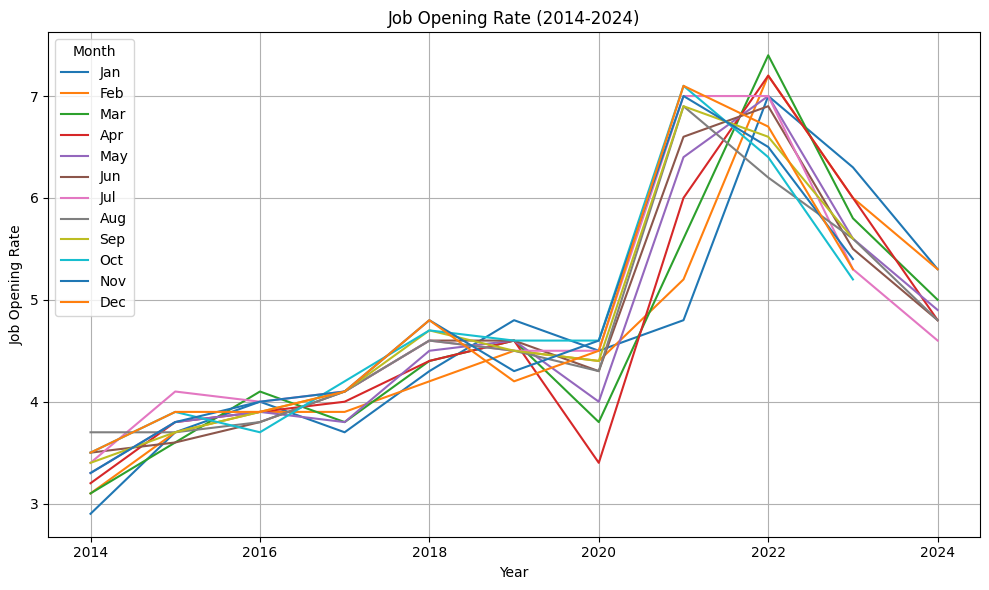

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'empr.xlsx'

df = pd.read_excel(file_path)

df.set_index('Year', inplace=True)

plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Job Opening Rate (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Job Opening Rate')
plt.legend(title='Month')
plt.grid(True)

plt.tight_layout()
plt.show()


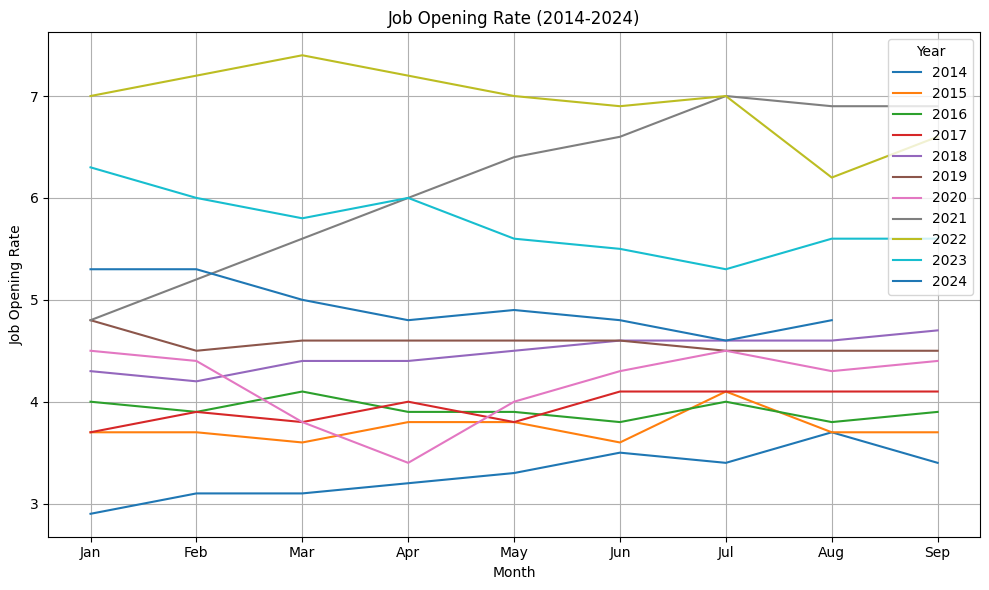

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'empr.xlsx'

df = pd.read_excel(file_path)

df_melted = df.melt(id_vars=['Year'], var_name='Month', value_name='Job Opening Rate')

df_melted['Job Opening Rate'] = pd.to_numeric(df_melted['Job Opening Rate'], errors='coerce')  # Convert to numeric, set errors to NaN

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
df_melted['Month'] = pd.Categorical(df_melted['Month'], categories=month_order, ordered=True)

df_melted.dropna(inplace=True)

plt.figure(figsize=(10, 6))
for year in df_melted['Year'].unique():
    plt.plot(df_melted[df_melted['Year'] == year]['Month'],
             df_melted[df_melted['Year'] == year]['Job Opening Rate'],
             label=year)

plt.title('Job Opening Rate (2014-2024)')
plt.xlabel('Month')
plt.ylabel('Job Opening Rate')
plt.legend(title='Year')
plt.grid(True)

plt.tight_layout()
plt.show()


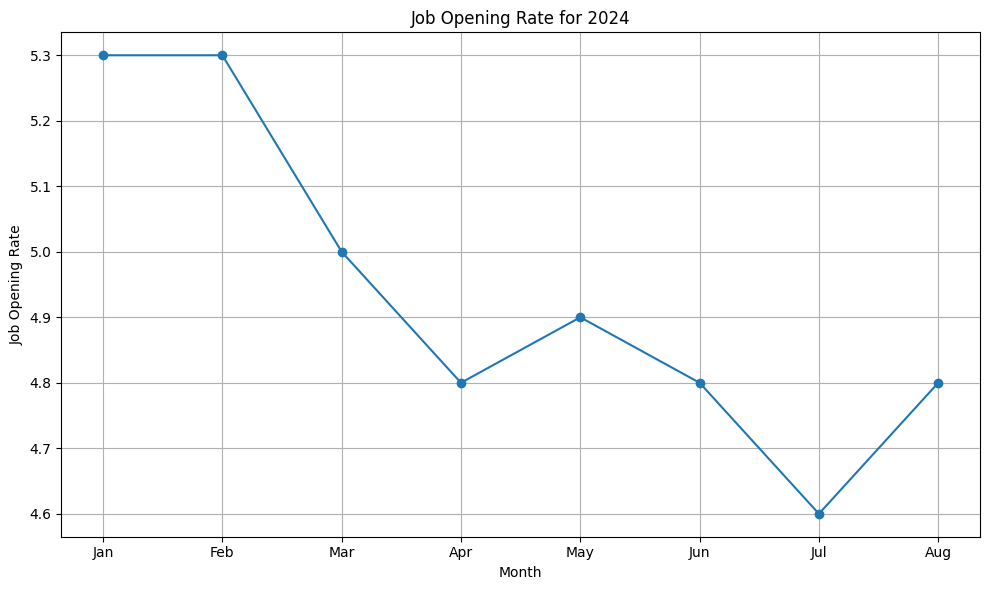

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'empr.xlsx'

df = pd.read_excel(file_path)

df_2024 = df[df['Year'] == 2024]

df_2024 = df_2024.drop(columns='Year')

df_2024 = df_2024.T
df_2024.columns = ['2024']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.plot(months[:len(df_2024)], df_2024['2024'], marker='o', label='2024')

plt.title('Job Opening Rate for 2024')
plt.xlabel('Month')
plt.ylabel('Job Opening Rate')
plt.grid(True)

plt.tight_layout()
plt.show()


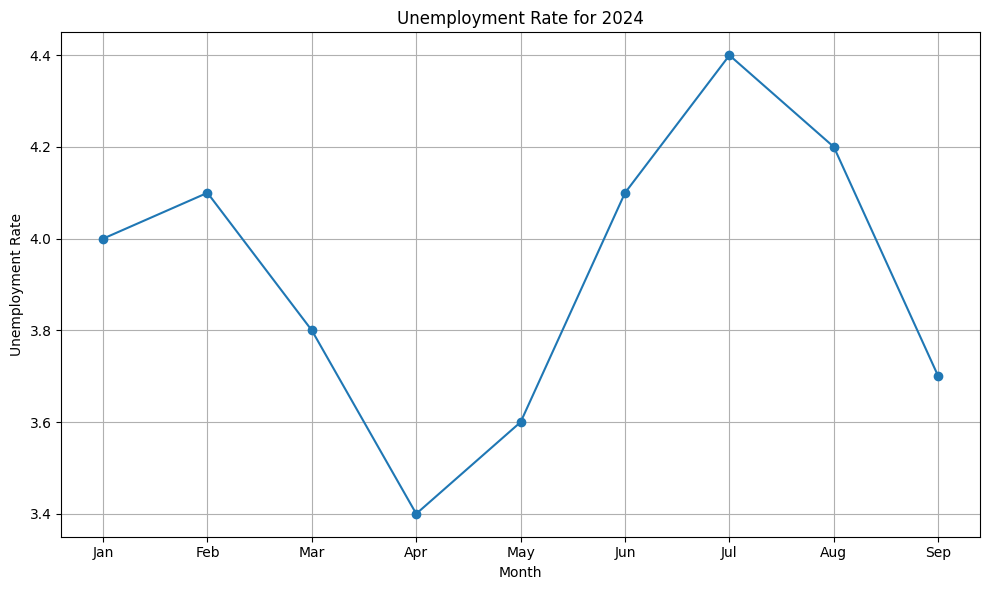

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'unemployment.xlsx'

df = pd.read_excel(file_path)

df_2024 = df[df['Year'] == 2024]

df_2024 = df_2024.drop(columns='Year')

df_2024 = df_2024.T
df_2024.columns = ['2024']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.plot(months[:len(df_2024)], df_2024['2024'], marker='o', label='2024')

plt.title('Unemployment Rate for 2024')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

##occupation matrix preprocessing


In [ ]:
import pandas as pd

file_path = 'ocmatrix.csv'
df = pd.read_csv(file_path)

df_sorted = df.sort_values(by='2023 Percent of Industry', ascending=False)

top_5_industries = df_sorted[['Industry Title', '2023 Percent of Industry', 'Projected 2033 Percent of Industry', 'Projected 2033 Employment']].head(20)

print(top_5_industries)


                                        Industry Title  \
167                                Software publishers   
173  Web search portals, libraries, archives, and o...   
209       Computer systems design and related services   
79     Computer and peripheral equipment manufacturing   
175  Computing infrastructure providers, data proce...   
166    Publishing, broadcasting, and content providers   
172  Media streaming distribution services, social ...   
162                                        Information   
84   Manufacturing and reproducing magnetic and opt...   
168  Miscellaneous information services (5131, 516,...   
80              Communications equipment manufacturing   
83   Navigational, measuring, electromedical, and c...   
78       Computer and electronic product manufacturing   
202   Professional, scientific, and technical services   
201   Professional, scientific, and technical services   
212  Research and development in the physical, engi...   
211       Scie

In [ ]:
import pandas as pd

csv1 = pd.read_csv('software.csv')
csv2 = pd.read_csv('data.csv')
csv3 = pd.read_csv('computer.csv')
stacked_df = pd.concat([csv1, csv2, csv3], ignore_index=True)

stacked_df.to_csv('stacked_output.csv', index=False)


len(stacked_df)

38

In [ ]:
df = stacked_df

In [ ]:
df['Occupation Title'] = df['Occupation Title'].apply(lambda x: x.split('*')[0].strip())

df.to_csv('cleaned_output.csv', index=False)

print(df[['Occupation Title']])

                                     Occupation Title
0                                Computer programmers
1                                 Software developers
2     Software quality assurance analysts and testers
3                Training and development specialists
4   Aerospace engineering and operations technolog...
5           Computer and information systems managers
6                     Computer occupations, all other
7                           Computer systems analysts
8   Computer, automated teller, and office machine...
9                                   Data entry keyers
10                                    Data scientists
11                            Database administrators
12                                Database architects
13  First-line supervisors of office and administr...
14                             Statistical assistants
15                   Architectural and civil drafters
16  Career/technical education teachers, postsecon...
17       Computer and inform

In [ ]:
df = df.drop(columns=["Occupation Code", "Education Code", "trCode", "Workex Code", "Typical Entry-Level Education", "Work Experience in a Related Occupation"])


In [ ]:
df = df.drop(columns=["Typical on-the-job Training"])

In [ ]:
df.head()

,Occupation Title,Employment 2023,Employment 2033,"Employment Change, 2023-2033","Employment Percent Change, 2023-2033","Occupational Openings, 2023-2033 Annual Average",Median Annual Wage 2023
0,Computer programmers,139.4,126.0,-13.4,-9.6,6.4,"99,700"
1,Software developers,"1,692.1","1,995.7",303.7,17.9,125.1,"132,270"
2,Software quality assurance analysts and testers,205.0,229.2,24.2,11.8,15.0,"101,800"
3,Training and development specialists,420.1,468.6,48.5,11.5,42.2,"64,340"
4,Aerospace engineering and operations technolog...,11.0,11.9,0.9,7.9,1.1,"77,830"


In [ ]:
df['Median Annual Wage'] = df['Median Annual Wage 2023'].str.replace('"', '', regex=False).str.replace(',', '', regex=False).str.strip()

df['Median Annual Wage'] = df['Median Annual Wage'].astype(float)
df = df.drop(columns=["Median Annual Wage 2023"])
print(df)

                                     Occupation Title Employment 2023  \
0                                Computer programmers           139.4   
1                                 Software developers         1,692.1   
2     Software quality assurance analysts and testers           205.0   
3                Training and development specialists           420.1   
4   Aerospace engineering and operations technolog...            11.0   
5           Computer and information systems managers           613.5   
6                     Computer occupations, all other           470.9   
7                           Computer systems analysts           527.2   
8   Computer, automated teller, and office machine...            85.7   
9                                   Data entry keyers           163.9   
10                                    Data scientists           202.9   
11                            Database administrators            80.5   
12                                Database architec

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df.head()

,Occupation Title,Employment 2023,Employment 2033,"Employment Change, 2023-2033","Employment Percent Change, 2023-2033","Occupational Openings, 2023-2033 Annual Average",Median Annual Wage 2023,Median Annual Wage
0,Computer programmers,139.4,126.0,-13.4,-9.6,6.4,"99,700","99,700"
1,Software developers,"1,692.1","1,995.7",303.7,17.9,125.1,"132,270","132,270"
2,Software quality assurance analysts and testers,205.0,229.2,24.2,11.8,15.0,"101,800","101,800"
3,Training and development specialists,420.1,468.6,48.5,11.5,42.2,"64,340","64,340"
4,Aerospace engineering and operations technolog...,11.0,11.9,0.9,7.9,1.1,"77,830","77,830"
